In [1]:
#!pip install xgboost
#!pip install lightgbm
#!pip install matplotlib
#!pip install streamlit

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:

# Veriyi okuma
df = pd.read_csv('veri.csv')

# Özellikler ve hedef değişken
X = df.drop('Diabetes_Status', axis=1)
y = df['Diabetes_Status']

In [5]:

# Kategorik değişkenleri dönüştürme
categorical_columns = ['Gender', 'Family_History', 'Smoking', 'Alcohol_Consumption']
X = pd.get_dummies(X, columns=categorical_columns)

In [6]:
# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

# Modeller listesi (12 model)
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}
# Sonuçları saklamak için sözlük
results = {}


In [9]:

# Her modeli eğit ve değerlendir
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       147
           1       0.93      0.75      0.83        53

    accuracy                           0.92       200
   macro avg       0.92      0.87      0.89       200
weighted avg       0.92      0.92      0.92       200


Training Decision Tree...
Decision Tree Accuracy: 0.9050
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       147
           1       0.84      0.79      0.82        53

    accuracy                           0.91       200
   macro avg       0.88      0.87      0.88       200
weighted avg       0.90      0.91      0.90       200


Training Random Forest...
Random Forest Accuracy: 0.9150
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00   

In [10]:

# En iyi modeli bul
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nEn iyi model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")


En iyi model: AdaBoost (Accuracy: 0.9600)


In [11]:

# En iyi modeli kaydet
joblib.dump(best_model, 'eniyi.joblib')
# Scaler'ı da kaydet (Streamlit uygulaması için gerekli olacak)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [12]:

# Sonuçları görselleştir
import matplotlib.pyplot as plt

# İlk grafik: Tüm modeller
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

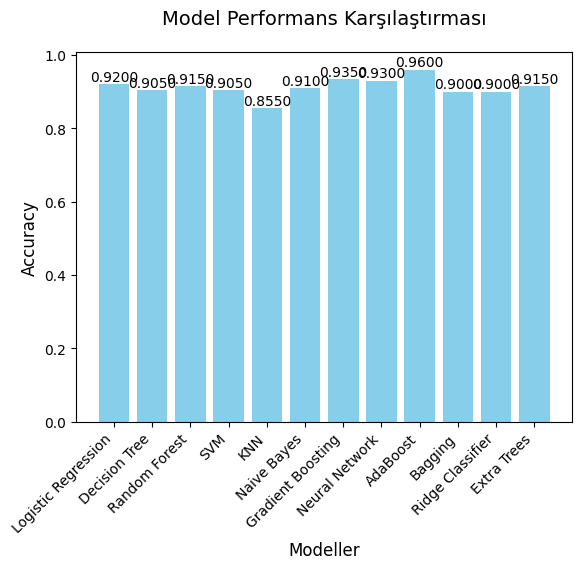

In [13]:
# Çubuk grafiği oluştur
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Performans Karşılaştırması', fontsize=14, pad=20)
plt.xlabel('Modeller', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# X ekseni etiketlerini 45 derece döndür
plt.xticks(rotation=45, ha='right')

# Çubukların üzerine değerleri yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

In [14]:
# Grafik düzenini ayarla
plt.tight_layout()

# Grafiği göster
plt.show()

# Sonuçları sıralı bir şekilde yazdır
print("\nModellerin Başarı Sıralaması:")
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
for model, accuracy in sorted_results.items():
    print(f"{model}: {accuracy:.4f}")

<Figure size 640x480 with 0 Axes>


Modellerin Başarı Sıralaması:
AdaBoost: 0.9600
Gradient Boosting: 0.9350
Neural Network: 0.9300
Logistic Regression: 0.9200
Random Forest: 0.9150
Extra Trees: 0.9150
Naive Bayes: 0.9100
Decision Tree: 0.9050
SVM: 0.9050
Bagging: 0.9000
Ridge Classifier: 0.9000
KNN: 0.8550


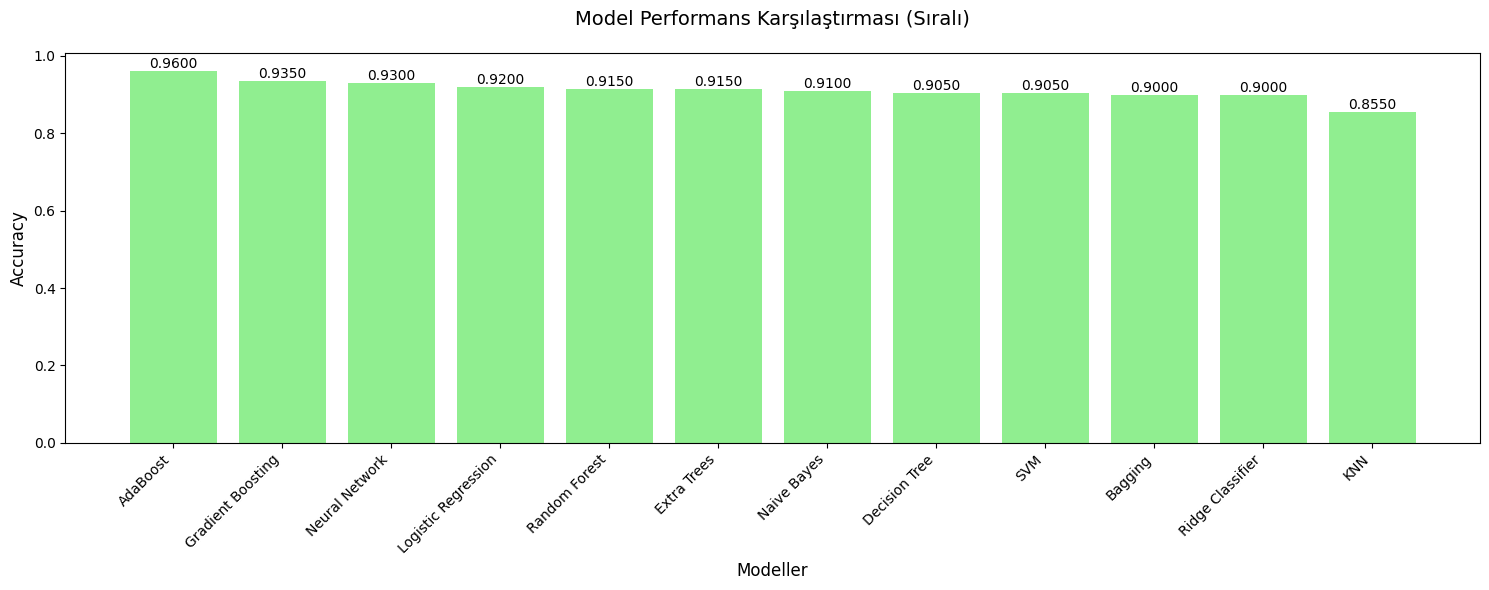

In [15]:

# İkinci grafik: Sıralı sonuçlar
plt.figure(figsize=(15, 6))

# Sıralı çubuk grafiği oluştur
bars = plt.bar(sorted_results.keys(), sorted_results.values(), color='lightgreen')
plt.title('Model Performans Karşılaştırması (Sıralı)', fontsize=14, pad=20)
plt.xlabel('Modeller', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# X ekseni etiketlerini 45 derece döndür
plt.xticks(rotation=45, ha='right')

# Çubukların üzerine değerleri yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Grafik düzenini ayarla
plt.tight_layout()

# Grafiği göster
plt.show()